<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [116]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [117]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID_Name = "20214537 Tom Keane" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [118]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [119]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [120]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [121]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [122]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [123]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [124]:
!pip install gpy

In [125]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [126]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [127]:
def import_datasets(git_link = 'https://raw.githubusercontent.com/tomkeane07/AI-Projects-UL/Etivity3/semester3/MachineLearningApplications/E3/'):
  return {
      'Test'  : pd.read_csv(git_link+'HousePrice_Test.csv'),
      'Train' : pd.read_csv(git_link+'HousePrice_Train.csv'),
      'true_price'  : pd.read_csv(git_link+'sample_submission.csv')}
def sort_columns(df):
  return df.reindex(sorted(df.columns), axis=1)

def hide_one_hot_encoded_cols(df):
  return df.loc[:, ~df.columns.str.startswith('Location') & 
                      ~df.columns.str.startswith('Type')]


try:
  dbs
except:
  dbs = import_datasets()

dftest  =  dbs['Test' ]
dftrain =  dbs['Train']
dfcost = dbs['true_price']
dftest['Price'] = dfcost['Price']

df0 = sort_columns(dftrain.append(dftest))

In [128]:
display(df0.tail())

,BER_class,Description,Features,ID,Index,Latitude,Location,Longitude,Num_Bathrooms,Num_Beds,Price,Services,Surface,Type
697,G,Sherry FitzGerald is delighted to present 56 B...,Secure gated and well maintained development\n...,12392566,2336,53.343377,Kilmainham,-6.296654,1,1,3835888.0,NaN,40.0,apartment
698,D2,26 Viking Road is a well presented and moderni...,Well presented and modernised extended two bed...,12352487,2337,53.351074,Stoneybatter,-6.285557,1,2,1106700.0,NaN,57.0,terraced
699,D1,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....,None,12387290,2338,53.261710,Cabinteely,-6.164979,1,3,1103343.0,"Parking,Gas Fired Central Heating",93.0,semi-detached
700,NaN,DNG are delighted to represent the sale of 109...,Gas fired central heating.\nFully renovated an...,12382807,2339,53.360515,Clontarf,-6.189661,2,3,1273647.0,NaN,118.0,terraced
701,F,This is an instantly appealing Jennings built ...,Drenched in natural light\nSuperb blank canvas...,12393769,2340,53.280408,Glenageary,-6.132925,1,3,1820012.0,NaN,122.0,semi-detached


In [129]:
display(df0.describe())

print("\n\nmissing values _ %")
print(df0.isna().sum()* 100 / len(df0))
print("_________\nunique values")
print(df0.nunique(axis=0))

,ID,Index,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Surface
count,2.340000e+03,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2.338000e+03,2340.000000
mean,1.231814e+07,1170.500000,53.350464,-6.254283,2.046154,3.026496,1.168656e+06,158.459546
std,1.439340e+05,675.644137,0.075966,0.130826,1.192648,1.327893,1.275073e+06,1509.949934
min,1.118567e+07,1.000000,52.501856,-6.521183,1.000000,1.000000,1.999500e+04,3.400000
25%,1.228052e+07,585.750000,53.294706,-6.308530,1.000000,2.000000,3.300000e+05,73.000000
50%,1.238029e+07,1170.500000,53.341213,-6.247780,2.000000,3.000000,5.400000e+05,97.750000
75%,1.240470e+07,1755.250000,53.381988,-6.189027,3.000000,4.000000,1.573798e+06,136.002500
max,1.242836e+07,2340.000000,53.630588,-1.744995,18.000000,27.000000,8.900000e+06,72236.387140




missing values _ %
BER_class        15.34188
Description       0.00000
Features          0.00000
ID                0.00000
Index             0.00000
Latitude          0.00000
Location          0.00000
Longitude         0.00000
Num_Bathrooms     0.00000
Num_Beds          0.00000
Price             0.08547
Services         64.82906
Surface           0.00000
Type              0.00000
dtype: float64
_________
unique values
BER_class          16
Description      2338
Features         1622
ID               2340
Index            2340
Latitude         2269
Location          148
Longitude        2277
Num_Bathrooms      11
Num_Beds           12
Price             967
Services           33
Surface           859
Type               10
dtype: int64


In [130]:
dropcols = ['Index', 'ID']

In [131]:
def inspect_data(df, dropcols):
  df = df.drop(df[dropcols], axis=1)
  sns.pairplot(data=df.dropna())
  plt.show()
  display(df.describe())

def print_text_col_examples(df):
  cols = df[['Description', 'Features', 'Services']].notna()
  print("Description")
  print(df[['Description']][cols].tail(5).values, end='\n\n')

  print('Features')
  print(df[['Features']][cols].tail(5).values, end="\n\n")

  print('Services')
  print(df[['Services']][cols].tail(5).values, end="\n\n")

print_text_col_examples(df0)

Description
[['Sherry FitzGerald is delighted to present 56 Bow Bridge Place to the market. A wonderful opportunity to acquire this well presented one bedroom ground floor apartment ideally situated within this popular development, close to the City Centre. No. 56 is sure to appeal to a wide audience of buyers from someone looking to buy their first home, looking to trade down or indeed an astute investor looking for an investment opportunity.\n\nThe apartment is practically designed, the accommodation briefly comprises: entrance hall with storage room, open plan living/dining room providing direct access out to the front of the apartment block, fully fitted kitchen, one double bedroom and a main bathroom. \n\nBow Bridge is a fine development ideally located in the heart of Kilmainham, a cultural location within Dublin city within distance of a host of a local amenities and public transport. Local attractions include the Museum of Modern Art, Kilmainham Gaol Museum., The Royal Kilmainh

In [132]:
df0.drop_duplicates(subset=['BER_class'])['BER_class']

0                       C3
1                       D1
2                       A3
3                       E1
7                      NaN
10                       G
11                      E2
15                      C2
16     SINo666of2006exempt
19                       F
24                      B2
27                      C1
36                      D2
63                      B3
146                     B1
184                     A2
800                     A1
Name: BER_class, dtype: object

In [133]:
def drop_cols(df, dropcols):
  print("dropping", end=" ")
  for col in dropcols:
    print(col, end=", ")
    df.drop(col, axis=1, inplace=True)
  print("...")
  return df

def col_to_colCount(df, col, divider):
  #this is designed for features and facilities to convert it to a rough count
  # of features, based on how they're typically listed in the df
  print("extracting "+col +"...")
  df[col] = df[col].fillna("")
  df[col+"_count"] = df[col].apply(lambda x: x.count(divider)+1)
  return df

def sort_Services(df, col):
  # Courtesy of Tim Hrisikos
  print(f"extracting {col}...")
  df[col] = df[col].fillna("")
  df = df.join(
      df[col].str.extractall('([^,]+)')[0].groupby(level=0).apply(pd.value_counts).unstack(fill_value=0).add_prefix('Service_')
      )
  df.drop('Services', axis=1, inplace=True)
  return df

BER_class_mapper = {
    #Thanks Nigel Portley
    "SINo666of2006exempt": 1,
    "A1": 2,
    "A2": 3,
    "A3": 4,
    "B1": 5,
    "B2": 6,
    "B3": 7,
    "C1": 8,
    "C2": 9,
    "C3": 10,
    "D1": 11,
    "D2": 12,
    "E1": 13,
    "E2": 14,
    "F": 15,
    "G": 16
}

def onehotencode(df, col, drop_first=True):
  print("one hot encoding " + col)
  return pd.get_dummies(df, columns=[col], 
                        dummy_na=True, 
                        drop_first=drop_first)

def remove_locations_outside_Ire(df):
  # Carlos Siqueira Do Amaral noticed that there are entries from outside of Ireland.
  # This fiunction removes locations outside of Ireland's lat/ long bounds
  print("removing locations outside of Ireland")
  long0, lat0, long1, lat1 = (-9.97708574059, 51.6693012559, -6.03298539878, 55.1316222195)
  return df.loc[(df['Longitude'] > long0) & (df['Latitude'] > lat0)  & (df['Longitude'] < long1) & (df['Latitude'] < lat1)]

def frame_coordinates_to_dublin_center(df, ):
  print("centering coordinates around dublin city center")
  dublat, dublong = 53.350140, -6.266155
  df['dist_from_dub_center'] = (df.Longitude - dublong)**2 +(df.Latitude - dublat)**2
  df['Latitude'] = df.Latitude - dublat
  df['Longitude'] = df.Longitude - dublong
  return df

def treat_data(df, dropcols = [], display_=True):
  # dropping columns listed below
  try:
    df = drop_cols(df, dropcols)
  except:
    pass
  #filling values. Justifications outlined in Initial datasets inspection
  df['Surface'].fillna(df['Surface'].median(), inplace=True)
  df['Num_Bathrooms'].fillna(df['Num_Bathrooms'].median(), inplace=True)
  df['Num_Beds'].fillna(df['Num_Beds'].median(), inplace=True)
  #converting features. Justifications outlined in Initial datasets inspection
  df = sort_Services(df, 'Services')
  df['BER_class'] = df['BER_class'].replace(BER_class_mapper)
  df['BER_class'].fillna(df['BER_class'].mean(), inplace=True)
  for col in ['Type', 'Location']:
    df = onehotencode(df, col, False)
  df.fillna(0,inplace=True)
  # a couple of extra columns added based on local features.
  df = remove_locations_outside_Ire(df)
  df = frame_coordinates_to_dublin_center(df)
  df = sort_columns(df)
  try:
    df = df[(df.price > 0)]
  except:
      pass
  if display_:
    print("\n\ndisplaying data minus one_hot_encoded columns")
    display(hide_one_hot_encoded_cols(df).tail())
  X = df.drop("Price", axis = 1)
  y = df["Price"]
  return df, X, y

In [134]:
display(df0.tail(0))

,BER_class,Description,Features,ID,Index,Latitude,Location,Longitude,Num_Bathrooms,Num_Beds,Price,Services,Surface,Type


In [135]:
df, X, y = treat_data(df0, dropcols)

dropping Index, ID, ...
extracting Services...
one hot encoding Type
one hot encoding Location
removing locations outside of Ireland
centering coordinates around dublin city center


displaying data minus one_hot_encoded columns


,BER_class,Description,Features,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,dist_from_dub_center
1633,9.0,Built in c.1930 38 Stradbrook Road is a deligh...,Extremely convenient location \nWheelchair acc...,-0.057373,0.099487,1,2,500000.0,1.0,1.0,0.0,1.0,1.0,0.0,64.00,0.013189
1634,8.0,An impressive three-story family home superbly...,Gas fired central heating with underfloor heat...,-0.065165,0.087470,3,5,795000.0,0.0,0.0,0.0,0.0,0.0,0.0,175.96,0.011897
1635,4.0,DNG Lucan's leading estate agents are delighte...,None,0.001527,-0.169123,2,3,340000.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00,0.028605
1636,12.0,Holyrood Castle is a most distinctive 19th cen...,None,-0.021143,0.045125,8,8,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,507.00,0.002483
1637,13.0,A superb opportunity awaits to acquire this be...,Turn key condition\nWood burning stove\nSlider...,-0.118702,0.141133,2,2,370000.0,0.0,0.0,0.0,0.0,0.0,0.0,50.00,0.034009


BER_class               0
Description             0
Features                0
Latitude                0
Location_Adamstown      0
                       ..
Type_site               0
Type_studio             0
Type_terraced           0
Type_townhouse          0
dist_from_dub_center    0
Length: 176, dtype: int64


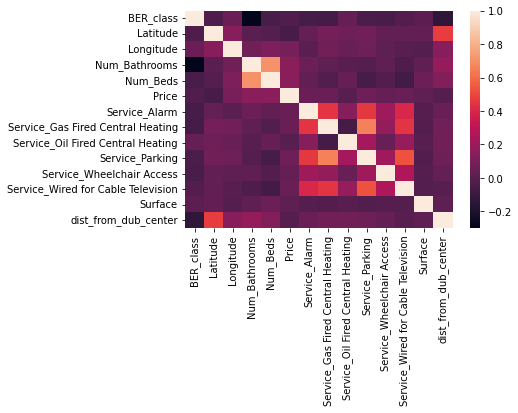

In [136]:
print(df.isna().sum())
display(sns.heatmap(hide_one_hot_encoded_cols(df).corr()))

### Outliers

In [137]:
# from scipy import stats
# hide_one_hot_encoded_cols(df.loc[:, ~df.columns.str.startswith('Description') & 
#                       ~df.columns.str.startswith('Features')])[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df['Num_Bathrooms'].values[df['Num_Bathrooms'].values > 8] = 8
df['Num_Beds'].values[df['Num_Beds'].values > 10] = 10
# df['Surface'].values[df['Surface'].values == 6705] = 67
df.drop(df[df.Surface > 800].index, inplace=True)

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

Description and Features are two columns which have potential for NLP. Though **Services** is also a text based feature, it is simply listing utilities availiable at each property, and does not illicit any descriptive or connotative language which would be useful for NLP.
Similarly **Location** not a useful column.

In [138]:
# your code here
nlp_df = df[['Description', 'Features', 'Price']]
nlp_df['Descr_Featu'] = df['Description']+ ' \n '+df['Features']

In [139]:
def remove_not_letters_from_col(df, col):
  df[col] = [re.sub('[^a-zA-Z]', ' ', phrase) for phrase in df[col]]
  return df

def list_of_words(df, col):
  return [sms.split() for sms in df[col]]


# function to normalize words
def normalize(words, stemmer, stop):
  normalized_words = list()
  for word in words:
    # remove  the most common words
    if word.lower() not in stop: 
      # stemming
      new_word = stemmer.stem(word) 
      # lower case
      normalized_words.append(new_word.lower()) 
  return normalized_words

def normalize_words(words):
  try:
    stop = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english', ignore_stopwords=False)
  except:
    nltk.download('stopwords')
    normalize_words(words)
  return [normalize(word, stemmer, stop) for word in words]

def removing_stopwords_and_stemming(df, col):
  df = remove_not_letters_from_col(df, col)
  col_words = list_of_words(df, col)
  return df, col_words

def removing_short_words(df, col, short_word = 4):
  df[col] = df[col].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))
  return df

def update_col_with_normd_words(df, col, col_words_norm):
  df[col] = [" ".join(word) for word in col_words_norm]
  return df

def nlp_preprocessing(df, col, display_=True):
  df, col_words = removing_stopwords_and_stemming(df, col)
  col_words_norm = normalize_words(col_words)
  df = update_col_with_normd_words(df, col, col_words_norm)
  df = removing_short_words(df, col)
  if display_:
    display(df[col].tail())
  return df

In [140]:
nlp_df = nlp_preprocessing(nlp_df, 'Descr_Featu')
X = nlp_df.drop("Price", axis = 1)
y = nlp_df["Price"]

1633    built stradbrook delight bedroom doubl front c...
1634    impress three stori famili superbl locat newto...
1635    lucan estat agent delight present esker bedroo...
1636    holyrood castl distinct centuri storey basemen...
1637    superb opportun await acquir beauti bijou cott...
Name: Descr_Featu, dtype: object

## [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- Convert a collection of raw documents to a matrix of TF-IDF features.

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek 

def nlp_fitting_transforming(X, col):
  print("Convert_rawDocs_to_TF_IDF_feature_matrix")
  X_tfid = pd.Series()
  vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)
  X_tfid = vectorizer.fit_transform(X[col])
  return X_tfid

X = nlp_df.drop("Price", axis = 1)
y = nlp_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train, X_test = (nlp_fitting_transforming(X_train, 'Descr_Featu'),
                  nlp_fitting_transforming(X_test, 'Descr_Featu'))

print(f"X_train, X_test shapes:   {np.shape(X_train), np.shape(X_test)}")

Convert_rawDocs_to_TF_IDF_feature_matrix
Convert_rawDocs_to_TF_IDF_feature_matrix
X_train, X_test shapes:   ((1860, 300), (465, 300))


In [142]:
# display(sns.countplot(y))

In [143]:
# create a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fit to data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
# testing the model

prediction_train = model.predict(X_train)
# print('training prediction\t', prediction_train)

prediction_test = model.predict(X_test)
# print('test prediction\t\t', prediction_test)

In [145]:
np.set_printoptions(suppress=True)

#  probabilities in test
predi_prob = model.predict_proba(X_test)
print(predi_prob)

[[0.00054604 0.00055134 0.00057616 ... 0.00058485 0.00054819 0.00053887]
 [0.00054643 0.0005644  0.00056791 ... 0.0005498  0.00057079 0.00061486]
 [0.00051798 0.00054991 0.00056084 ... 0.00053716 0.00053453 0.00053571]
 ...
 [0.00054479 0.00055665 0.00054754 ... 0.00056671 0.00053513 0.00054812]
 [0.00057596 0.00058657 0.00063496 ... 0.00066182 0.00057559 0.00053996]
 [0.00055013 0.00053168 0.00051196 ... 0.00055756 0.00052225 0.00055396]]


As we can see, The model does not look too sure of any of it's predictions based on these test set **prediction probabilities**.

The Highest probability tends to 

In [146]:
# accuracy in training set
y_pred_train = prediction_train
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_train)))

Train Accuracy: 0.16129032258064516


In [147]:
# accuracy in test set (unseen data)
y_true = y_test
y_pred_test = prediction_test
print("Test Accuracy: "+str(accuracy_score(y_true, y_pred_test)))

Test Accuracy: 0.010752688172043012


In [148]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_test)
print("Confusion Matrix\n", conf_mat)

Confusion Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


despite these low accuracy scores, adding these predictions to our dataset for the following two Models may be interesting.

I will create a dataset - df2 which includes these figures.

In [149]:
df2 = df.copy()
df2['Price_pred_nlp'] = model.predict(nlp_fitting_transforming(X, 'Descr_Featu'))
df2 = sort_columns(df2)
display(hide_one_hot_encoded_cols(df2).describe())
display(hide_one_hot_encoded_cols(df2).tail()) 

Convert_rawDocs_to_TF_IDF_feature_matrix


,BER_class,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Price_pred_nlp,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,dist_from_dub_center
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2.325000e+03,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2.325000e+03
mean,10.703650,0.000541,0.009959,2.027527,3.004731,1.161125e+06,364862.365591,0.187957,0.367312,0.037849,0.493763,0.033978,0.234839,118.754516,1.394049e-02
std,2.986118,0.073822,0.091637,1.076313,1.176898,1.262665e+06,74039.913286,0.405885,0.533037,0.190873,0.591521,0.181213,0.453414,79.466778,1.625778e-02
min,1.000000,-0.135913,-0.255028,1.000000,1.000000,0.000000e+00,220000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,5.129842e-07
25%,9.000000,-0.055353,-0.042366,1.000000,2.000000,3.300000e+05,325000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.900000,2.159850e-03
50%,10.704190,-0.008981,0.018243,2.000000,3.000000,5.350000e+05,325000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.500000,7.548412e-03
75%,12.000000,0.031727,0.076482,3.000000,4.000000,1.558593e+06,395000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,135.000000,2.059258e-02
max,16.000000,0.280448,0.211436,8.000000,10.000000,7.950000e+06,995000.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,724.100000,8.115278e-02


,BER_class,Description,Features,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Price_pred_nlp,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,dist_from_dub_center
1633,9.0,Built in c.1930 38 Stradbrook Road is a deligh...,Extremely convenient location \nWheelchair acc...,-0.057373,0.099487,1,2,500000.0,450000.0,1.0,1.0,0.0,1.0,1.0,0.0,64.00,0.013189
1634,8.0,An impressive three-story family home superbly...,Gas fired central heating with underfloor heat...,-0.065165,0.087470,3,5,795000.0,795000.0,0.0,0.0,0.0,0.0,0.0,0.0,175.96,0.011897
1635,4.0,DNG Lucan's leading estate agents are delighte...,None,0.001527,-0.169123,2,3,340000.0,325000.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00,0.028605
1636,12.0,Holyrood Castle is a most distinctive 19th cen...,None,-0.021143,0.045125,8,8,2500000.0,325000.0,0.0,0.0,0.0,0.0,0.0,0.0,507.00,0.002483
1637,13.0,A superb opportunity awaits to acquire this be...,Turn key condition\nWood burning stove\nSlider...,-0.118702,0.141133,2,2,370000.0,395000.0,0.0,0.0,0.0,0.0,0.0,0.0,50.00,0.034009


# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [152]:
# your code here
pwr_df = df.loc[:, ~df.columns.str.startswith('Location')].drop(['Description', 'Features'], axis=1)
X = pwr_df.drop("Price", axis = 1)
y = pwr_df["Price"]

print('Number of nan in dataset: ',X.isnull().sum().sum())
print('Number of nan in dataset: ',y.isnull().sum().sum())
print(np.all(np.isfinite(y)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Number of nan in dataset:  0
Number of nan in dataset:  0
True


In [153]:
display(hide_one_hot_encoded_cols(pwr_df).describe())
display(hide_one_hot_encoded_cols(pwr_df).tail()) 

,BER_class,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,dist_from_dub_center
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2.325000e+03,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2.325000e+03
mean,10.703650,0.000541,0.009959,2.027527,3.004731,1.161125e+06,0.187957,0.367312,0.037849,0.493763,0.033978,0.234839,118.754516,1.394049e-02
std,2.986118,0.073822,0.091637,1.076313,1.176898,1.262665e+06,0.405885,0.533037,0.190873,0.591521,0.181213,0.453414,79.466778,1.625778e-02
min,1.000000,-0.135913,-0.255028,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,5.129842e-07
25%,9.000000,-0.055353,-0.042366,1.000000,2.000000,3.300000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.900000,2.159850e-03
50%,10.704190,-0.008981,0.018243,2.000000,3.000000,5.350000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.500000,7.548412e-03
75%,12.000000,0.031727,0.076482,3.000000,4.000000,1.558593e+06,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,135.000000,2.059258e-02
max,16.000000,0.280448,0.211436,8.000000,10.000000,7.950000e+06,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,724.100000,8.115278e-02


,BER_class,Latitude,Longitude,Num_Bathrooms,Num_Beds,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,dist_from_dub_center
1633,9.0,-0.057373,0.099487,1,2,500000.0,1.0,1.0,0.0,1.0,1.0,0.0,64.00,0.013189
1634,8.0,-0.065165,0.087470,3,5,795000.0,0.0,0.0,0.0,0.0,0.0,0.0,175.96,0.011897
1635,4.0,0.001527,-0.169123,2,3,340000.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00,0.028605
1636,12.0,-0.021143,0.045125,8,8,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,507.00,0.002483
1637,13.0,-0.118702,0.141133,2,2,370000.0,0.0,0.0,0.0,0.0,0.0,0.0,50.00,0.034009


In [154]:
display(X_train.describe())
display(y_train.head())

,BER_class,Latitude,Longitude,Num_Bathrooms,Num_Beds,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_nan,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,dist_from_dub_center
count,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.00000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.0,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000
mean,10.774567,0.001567,0.008156,2.021505,3.006989,0.188172,0.359677,0.04086,0.490323,0.034946,0.234409,118.016910,0.260215,0.029570,0.143011,0.024194,0.081183,0.0,0.266129,0.001613,0.001075,0.183333,0.009677,0.014005
std,2.985838,0.073041,0.092780,1.073205,1.174159,0.408450,0.534136,0.19802,0.596216,0.183693,0.453187,77.422511,0.438870,0.169443,0.350178,0.153691,0.273189,0.0,0.442051,0.040139,0.032782,0.387044,0.097923,0.016222
min,1.000000,-0.134876,-0.255028,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002
25%,9.000000,-0.054078,-0.044735,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,72.737500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.002213
50%,10.704190,-0.007849,0.016389,2.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007610
75%,13.000000,0.033141,0.076700,3.000000,4.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,135.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.020688
max,16.000000,0.280448,0.211436,8.000000,10.000000,2.000000,2.000000,1.00000,2.000000,1.000000,2.000000,724.100000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.081153


731      239950.0
1525     305000.0
1150     525000.0
326      265000.0
651     1622523.0
Name: Price, dtype: float64

(1860,)


Finished [100%]: Average Loss = 2,662.7


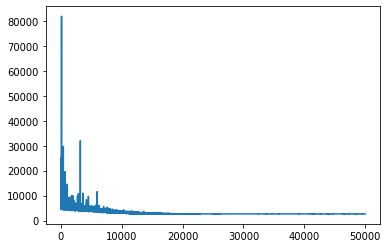

In [155]:

# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

print(y_train.shape)

# train set, input columns
Xs_train = X_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = y_train.values.reshape(-1,1) #.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = X_test.iloc[:,0:-1].values 
# test set, output column, cost
ys_test = y_test#.iloc[:,0:-1].values

# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
# ylog = np.log(ylog)

yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)


with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

    

#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [156]:
# samples from the posterior
posterior = approximation.sample(5000)

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test.values))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test.values) / y_test.values)))

MAE =  808665.6240044786
MAPE =  inf


# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [157]:
# your code here


# SUMMARY

Your summary here.